In [39]:
import ants
import nilearn
from nilearn import image
import os
import shutil
import nibabel as nib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nilearn.image import load_img
from nilearn.image import math_img
from nilearn.image import resample_to_img
from nipype.interfaces.ants import ApplyTransforms
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [16]:
directory = [i for i in os.listdir('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/FieldTrip') if i.startswith('sub')]

sub_ids = []
native_lh = []
native_rh = []
native_bi = []
native2mni_lh = []
native2mni_rh = []
native2mni_bi = []
mni_lh = []
mni_rh = []
mni_bi = []

def get_vox(sub, volume_list):
    sub = sub.get_fdata()
    volume = np.sum(sub)
    volume_list.append(volume)

def binary_bilateral(list1,list2,sums_list): #sum left and right to get bilateral
    sums = [(x + y) for x, y in zip(list1, list2)]
    sums_list.append(sums)


for i in directory:
    print(i)
    sub_ids.append(i)
    native_sub_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/FieldTrip/{i}/resampled/{i}_native_sim-binary_model-simbio_hemi-L.nii')
    native_sub_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/FieldTrip/{i}/resampled/{i}_native_sim-binary_model-simbio_hemi-R.nii')
    native2mni_sub_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/FieldTrip/{i}/resampled/{i}_native2MNI_sim-binary_model-simbio_hemi-L.nii')
    native2mni_sub_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/FieldTrip/{i}/resampled/{i}_native2MNI_sim-binary_model-simbio_hemi-R.nii')
    mni_sub_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/FieldTrip/{i}/resampled/{i}_MNI_sim-binary_model-simbio_hemi-L.nii')
    mni_sub_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/FieldTrip/{i}/resampled/{i}_MNI_sim-binary_model-simbio_hemi-R.nii')
    
    get_vox(native_sub_lh, native_lh)
    get_vox(native_sub_rh, native_rh)
    get_vox(native2mni_sub_lh, native2mni_lh)
    get_vox(native2mni_sub_rh, native2mni_rh)
    get_vox(mni_sub_lh, mni_lh)
    get_vox(mni_sub_rh, mni_rh)

    binary_bilateral(native_lh, native_rh, native_bi)
    binary_bilateral(native2mni_lh, native2mni_rh, native2mni_bi)
    binary_bilateral(mni_lh, mni_rh, mni_bi)
    
df = pd.DataFrame(
    {'ID': sub_ids,
     'Native_LH_Volume_Voxels': native_lh,
     'Native_RH_Volume_Voxels': native_rh,
     'Native_Bi_Volume_Voxels': native_bi,
     'Native2MNI_LH_Volume_Voxels': native2mni_lh,
     'Native2MNI_RH_Volume_Voxels': native2mni_rh,
     'Native2MNI_Bi_Volume_Voxels': native2mni_bi,
     'MNI_LH_Volume_Voxels': mni_lh,
     'MNI_RH_Volume_Voxels': mni_rh,
     'MNI_Bi_Volume_Voxels': mni_bi
    })

df.to_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Subject_Total_Volumes.csv',index=False)

sub-BER001
sub-BER002
sub-BER003
sub-BER004
sub-BER005
sub-BER006
sub-BER007
sub-BER008
sub-BER009
sub-BER010
sub-BER011
sub-BER012
sub-BER013
sub-BER014
sub-BER015
sub-BER016
sub-BER017
sub-BER018
sub-BER019
sub-BER020
sub-BER021
sub-BER022
sub-BER023
sub-BER024
sub-BER025
sub-BER026
sub-BER027
sub-BER028
sub-BER029
sub-BER030
sub-BER031
sub-BER032
sub-BER033
sub-BER034
sub-BER035
sub-BER036
sub-BER037
sub-BER038
sub-BER039
sub-BER040
sub-BER041
sub-BER042
sub-BER043
sub-BER044
sub-BER045
sub-BER046
sub-BER047
sub-BER048
sub-BER049
sub-BER050
sub-BER051


In [37]:
#get r and p values for overlaps
def r_p(vol_overlap_col):
    df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/OSS-DBS_Berlin51_Overlap_Control_Vol.csv')
    df = df.dropna()
    pearson_r, pearson_p = pearsonr(df['UPDRS_Improvement_Perc'],df[vol_overlap_col])
    spearman_r, spearman_p = spearmanr(df['UPDRS_Improvement_Perc'],df[vol_overlap_col])
    return pearson_r, pearson_p, spearman_r, spearman_p

native_stn_pearson_r,native_stn_pearson_p,native_stn_spearman_r,native_stn_spearman_p = r_p('Native_STN_Corrected_Vol_Voxels')
native2mni_stn_pearson_r,native2mni_stn_pearson_p,native2mni_stn_spearman_r,native2mni_stn_spearman_p = r_p('Native2MNI_STN_Corrected_Vol_Voxels')
mni_stn_pearson_r,mni_stn_pearson_p,mni_stn_spearman_r,mni_stn_spearman_p = r_p('MNI_STN_Corrected_Vol_Voxels')

native_motor_stn_pearson_r,native_motor_stn_pearson_p,native_motor_stn_spearman_r,native_motor_stn_spearman_p = r_p('Native_Motor_STN_Corrected_Vol_Voxels')
native2mni_motor_stn_pearson_r,native2mni_motor_stn_pearson_p,native2mni_motor_stn_spearman_r,native2mni_motor_stn_spearman_p = r_p('Native2MNI_Motor_STN_Corrected_Vol_Voxels')
mni_motor_stn_pearson_r,mni_motor_stn_pearson_p,mni_motor_stn_spearman_r,mni_motor_stn_spearman_p = r_p('MNI_Motor_STN_Corrected_Vol_Voxels')

native_pd_pearson_r,native_pd_pearson_p,native_pd_spearman_r,native_pd_spearman_p = r_p('Native_PD_STN_n275_Corrected_Vol_Voxels')
native2mni_pd_pearson_r,native2mni_pd_pearson_p,native2mni_pd_spearman_r,native2mni_pd_spearman_p = r_p('Native2MNI_PD_STN_n275_Corrected_Vol_Voxels')
mni_pd_pearson_r,mni_pd_pearson_p,mni_pd_spearman_r,mni_pd_spearman_p = r_p('MNI_PD_STN_n275_Corrected_Vol_Voxels')

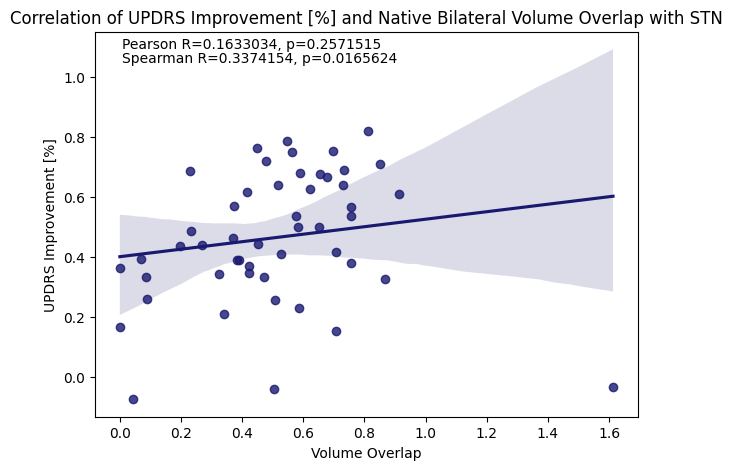

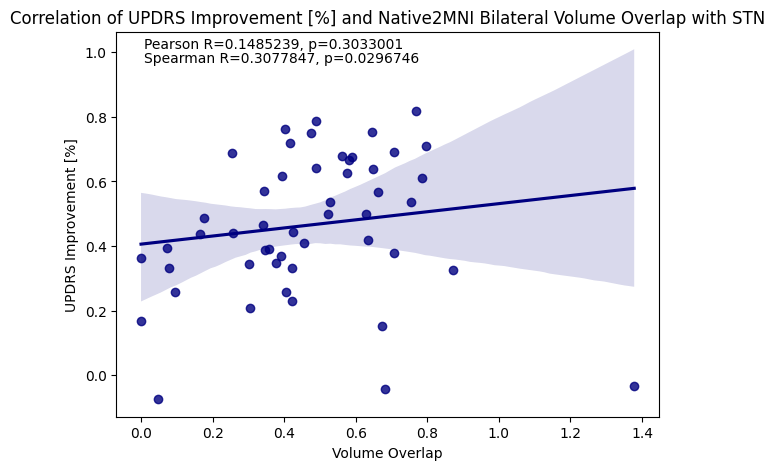

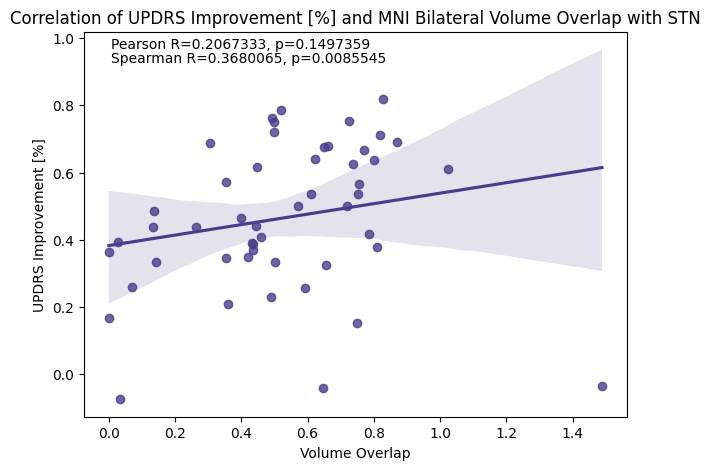

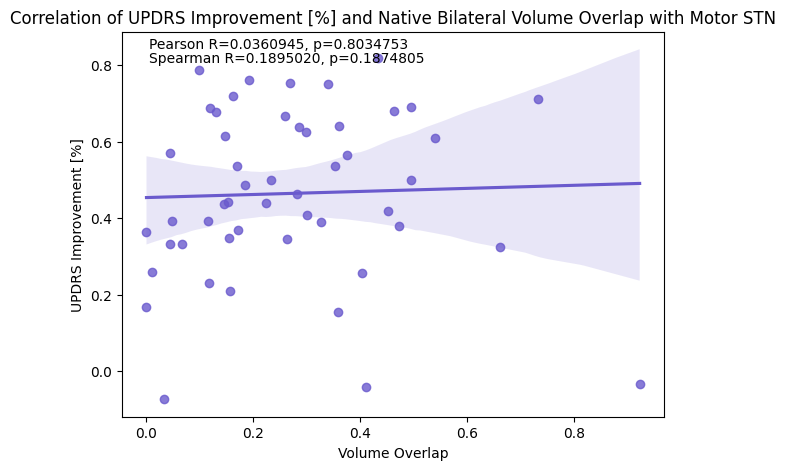

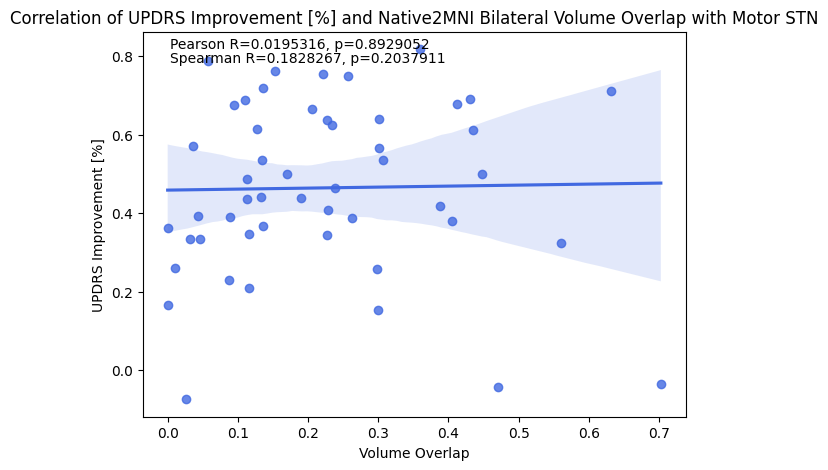

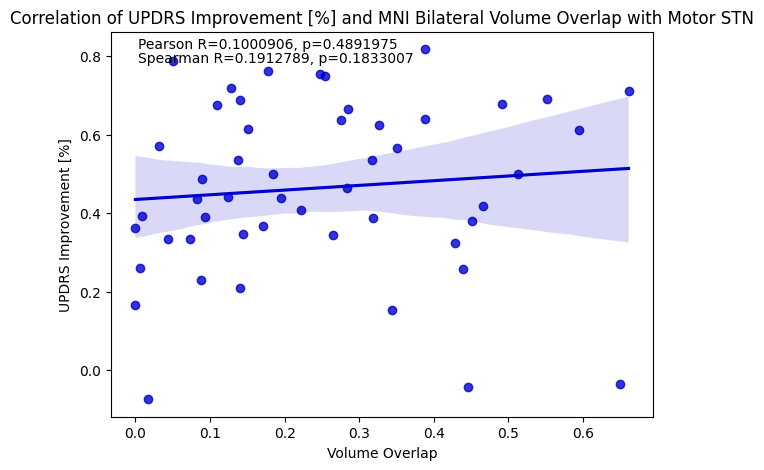

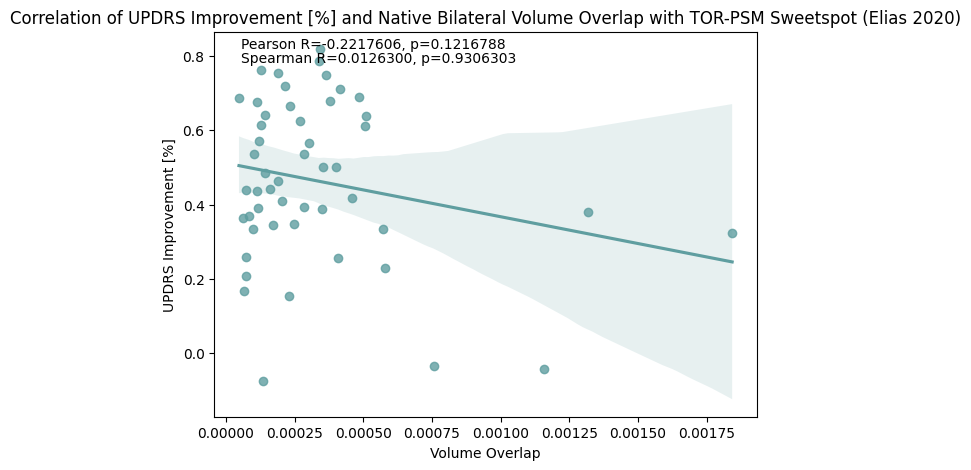

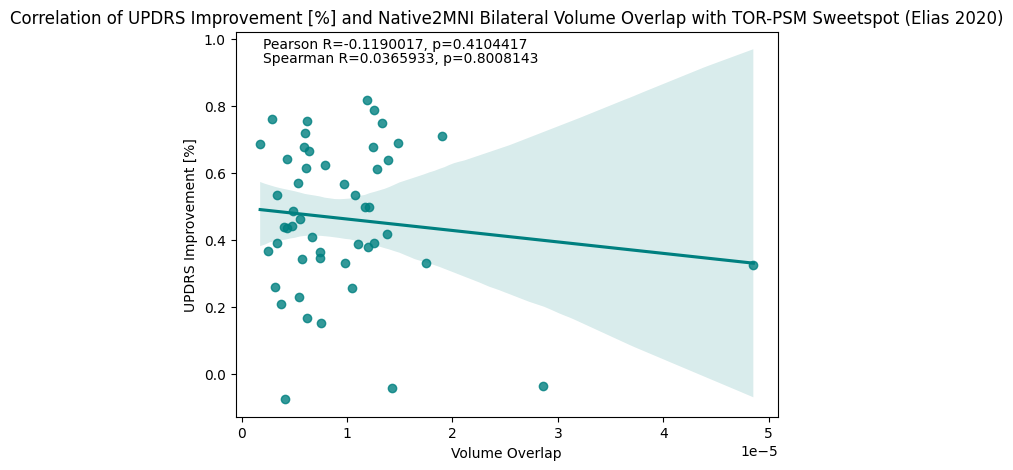

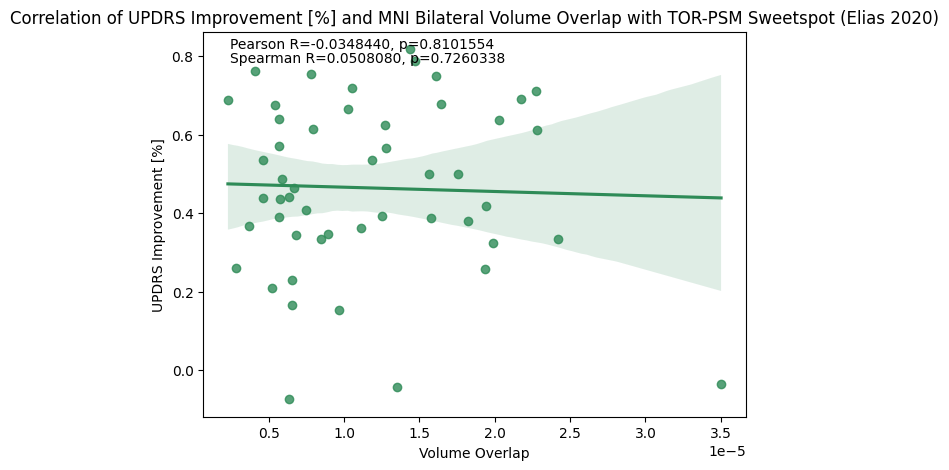

In [41]:
def plot_analysis(x_data, title, pearson_r_val, pearson_p_val, spearman_r_val, spearman_p_val, color,path):
    plt.figure(figsize=(7, 5))
    ax = sns.regplot(x=x_data, y=df['UPDRS_Improvement_Perc'], color=color)
    plt.title(title)
    plt.xlabel('Volume Overlap')
    plt.ylabel('UPDRS Improvement [%]')
    ax.text(0.05, 0.95, 'Pearson R={:.7f}, p={:.7f}'.format(pearson_r_val, pearson_p_val),
            transform=ax.transAxes, verticalalignment='bottom')
    ax.text(0.05, 0.95, 'Spearman R={:.7f}, p={:.7f}'.format(spearman_r_val, spearman_p_val),
            transform=ax.transAxes, verticalalignment='top')
    plt.savefig(path)
    plt.show()

df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/OSS-DBS_Berlin51_Overlap_Control_Vol.csv')
plot_analysis(df['Native_STN_Corrected_Vol_Voxels'],'Correlation of UPDRS Improvement [%] and Native Bilateral Volume Overlap with STN',native_stn_pearson_r,native_stn_pearson_p,native_stn_spearman_r,native_stn_spearman_p,'midnightblue','/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/OSS-DBS/Corrected4Vol/Native Bilateral Volume Overlap with STN.png')
plot_analysis(df['Native2MNI_STN_Corrected_Vol_Voxels'],'Correlation of UPDRS Improvement [%] and Native2MNI Bilateral Volume Overlap with STN',native2mni_stn_pearson_r,native2mni_stn_pearson_p,native2mni_stn_spearman_r,native2mni_stn_spearman_p,'navy','/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/OSS-DBS/Corrected4Vol/Native2MNI Bilateral Volume Overlap with STN.png')
plot_analysis(df['MNI_STN_Corrected_Vol_Voxels'],'Correlation of UPDRS Improvement [%] and MNI Bilateral Volume Overlap with STN',mni_stn_pearson_r,mni_stn_pearson_p,mni_stn_spearman_r,mni_stn_spearman_p,'darkslateblue','/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/OSS-DBS/Corrected4Vol/MNI Bilateral Volume Overlap with STN.png')

plot_analysis(df['Native_Motor_STN_Corrected_Vol_Voxels'],'Correlation of UPDRS Improvement [%] and Native Bilateral Volume Overlap with Motor STN',native_motor_stn_pearson_r,native_motor_stn_pearson_p,native_motor_stn_spearman_r,native_motor_stn_spearman_p,'slateblue','/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/OSS-DBS/Corrected4Vol/Native Bilateral Volume Overlap with Motor STN.png')
plot_analysis(df['Native2MNI_Motor_STN_Corrected_Vol_Voxels'],'Correlation of UPDRS Improvement [%] and Native2MNI Bilateral Volume Overlap with Motor STN',native2mni_motor_stn_pearson_r,native2mni_motor_stn_pearson_p,native2mni_motor_stn_spearman_r,native2mni_motor_stn_spearman_p,'royalblue','/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/OSS-DBS/Corrected4Vol/Native2MNI Bilateral Volume Overlap with Motor STN.png')
plot_analysis(df['MNI_Motor_STN_Corrected_Vol_Voxels'],'Correlation of UPDRS Improvement [%] and MNI Bilateral Volume Overlap with Motor STN',mni_motor_stn_pearson_r,mni_motor_stn_pearson_p,mni_motor_stn_spearman_r,mni_motor_stn_spearman_p,'mediumblue','/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/OSS-DBS/Corrected4Vol/MNI Bilateral Volume Overlap with Motor STN.png')

plot_analysis(df['Native_PD_STN_n275_Corrected_Vol_Voxels'],'Correlation of UPDRS Improvement [%] and Native Bilateral Volume Overlap with TOR-PSM Sweetspot (Elias 2020)',native_pd_pearson_r,native_pd_pearson_p,native_pd_spearman_r,native_pd_spearman_p,'cadetblue','/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/OSS-DBS/Corrected4Vol/Native Bilateral Volume Overlap with TOR-PSM Sweetspot (Elias 2020).png')
plot_analysis(df['Native2MNI_PD_STN_n275_Corrected_Vol_Voxels'],'Correlation of UPDRS Improvement [%] and Native2MNI Bilateral Volume Overlap with TOR-PSM Sweetspot (Elias 2020)',native2mni_pd_pearson_r,native2mni_pd_pearson_p,native2mni_pd_spearman_r,native2mni_pd_spearman_p,'teal','/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/OSS-DBS/Corrected4Vol/Native2MNI Bilateral Volume Overlap with TOR-PSM Sweetspot (Elias 2020).png')
plot_analysis(df['MNI_PD_STN_n275_Corrected_Vol_Voxels'],'Correlation of UPDRS Improvement [%] and MNI Bilateral Volume Overlap with TOR-PSM Sweetspot (Elias 2020)',mni_pd_pearson_r,mni_pd_pearson_p,mni_pd_spearman_r,mni_pd_spearman_p,'seagreen','/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/OSS-DBS/Corrected4Vol/MNI Bilateral Volume Overlap with TOR-PSM Sweetspot (Elias 2020).png')